In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image 
import time
from skimage import io
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from PIL import Image 
import coremltools 
import serial
ser =serial.Serial('/dev/cu.usbmodem14201',9600)
model = coremltools.models.MLModel('Model/CCNC.mlmodel')
cap=cv2.VideoCapture(1)

donewait 50 13 10
Cam!
check1


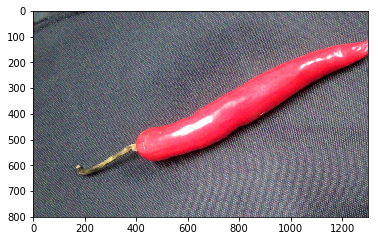

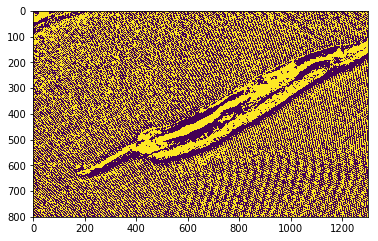

check2
check3
444 553 700 946
check4
check5


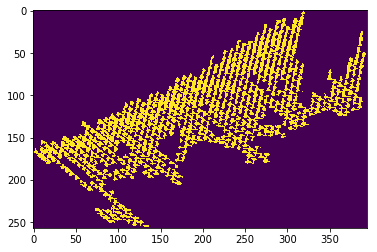

check6
check7
check8


/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in long_scalars


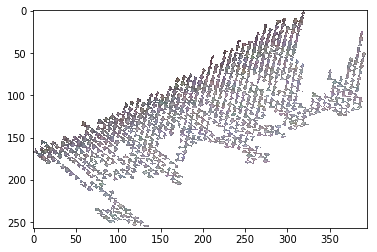

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


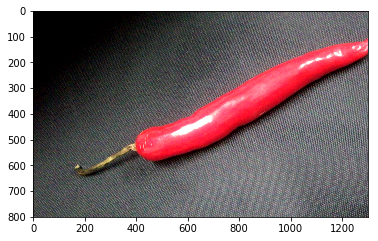

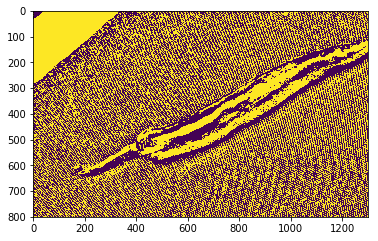

check2
check3
496 545 654 808
check4
check5


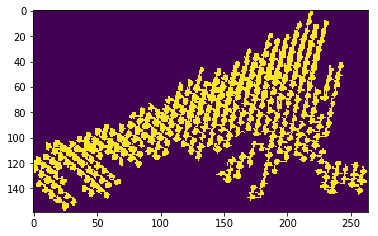

check6
check7
check8


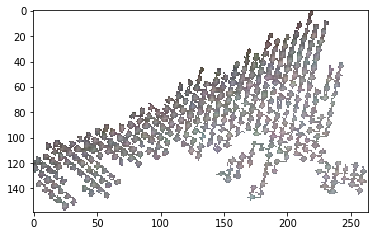

True
donee
donewait 49 13 10
donewait 50 13 10
Cam!
check1


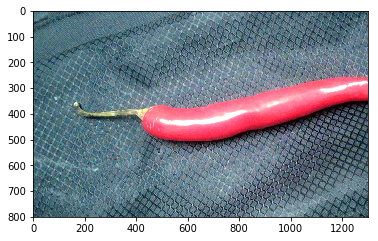

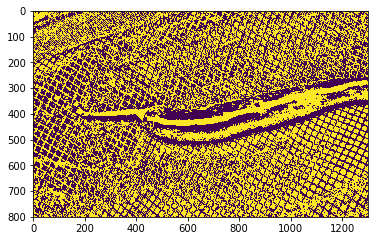

check2
check3
492 452 800 1300
check4
check5


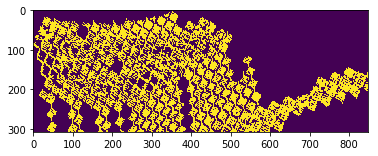

check6
check7
check8


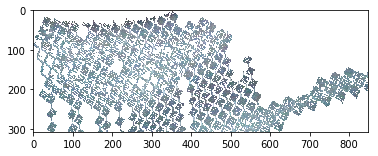

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


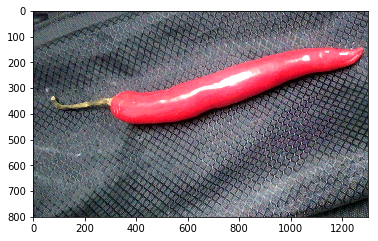

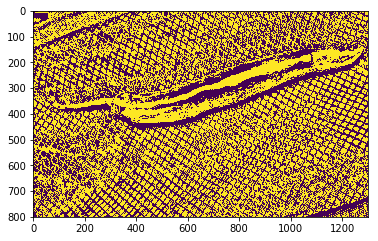

check2
check3
386 0 800 404
check4
check5


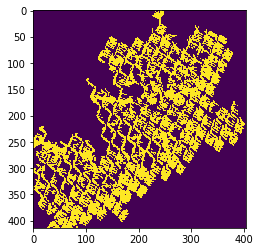

check6
No it blend 11.363636363636363
donewait 48 13 10
donewait 50 13 10
Cam!
check1


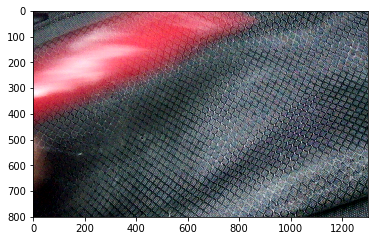

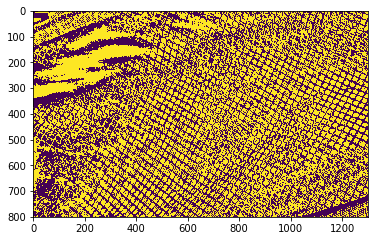

check2
check3
322 684 800 1300
check4
check5


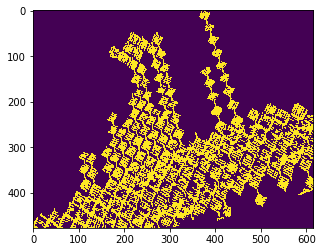

check6
check7
check8


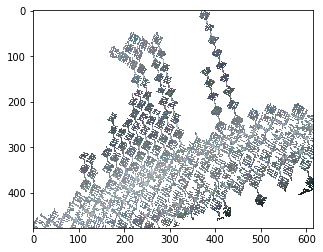

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


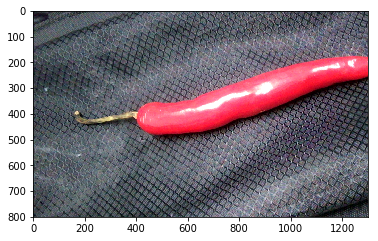

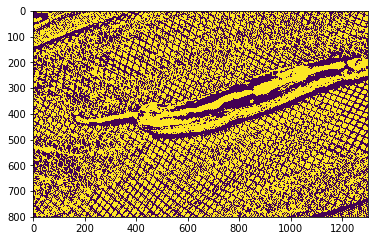

check2
check3
374 536 800 1300
check4
check5


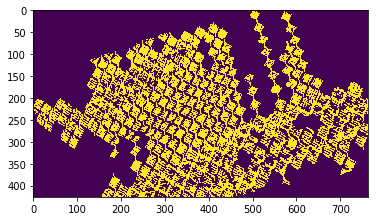

check6
check7
check8


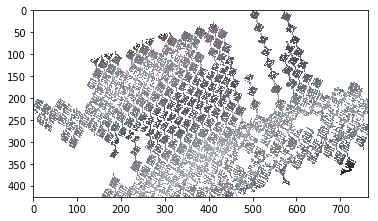

False
donee
donewait 50 13 10
Cam!
check1


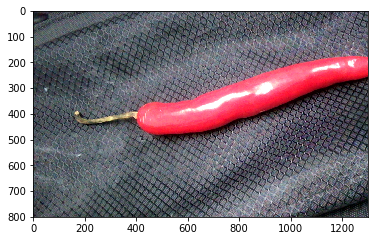

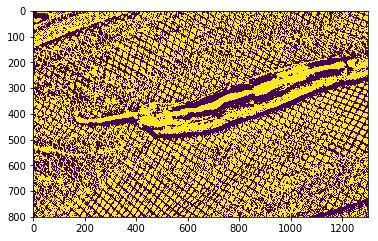

check2
check3
351 412 800 1300
check4
check5


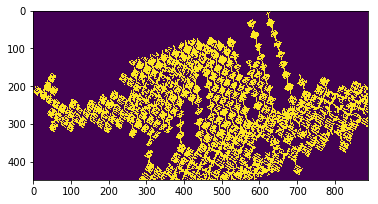

check6
check7
check8


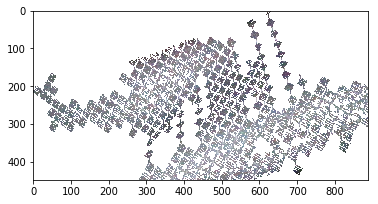

False
donee
donewait 50 13 10
Cam!
check1


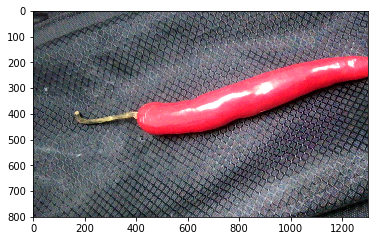

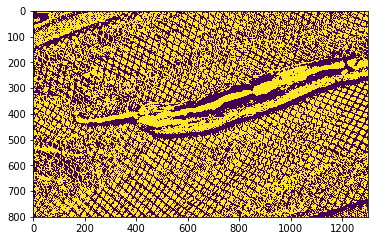

check2
check3
437 0 800 495
check4
check5


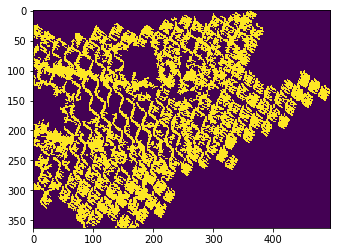

check6
check7
check8


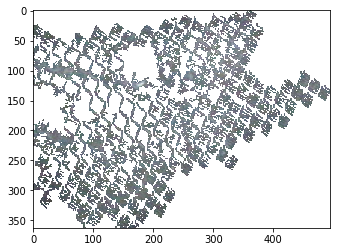

False
donee
donewait 50 13 10
Cam!
check1


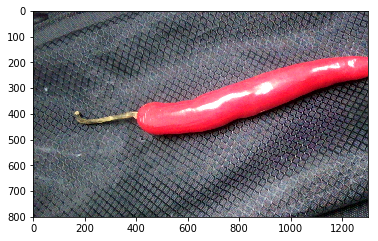

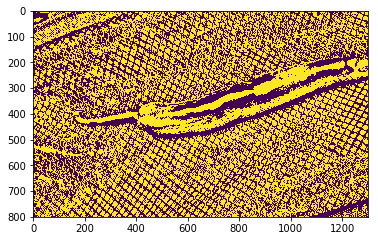

check2
check3
585 407 674 554
check4
check5


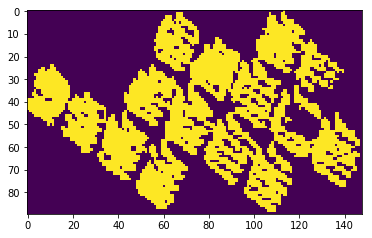

check6
check7
check8


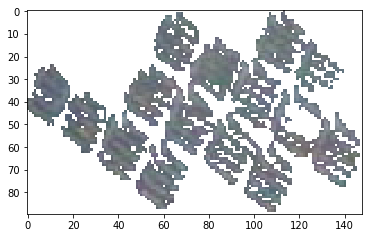

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


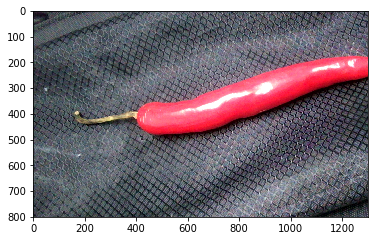

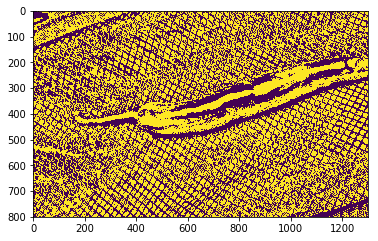

check2
check3
353 544 800 1300
check4
check5


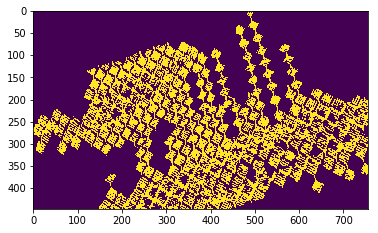

check6
check7
check8


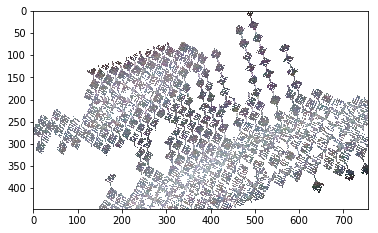

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


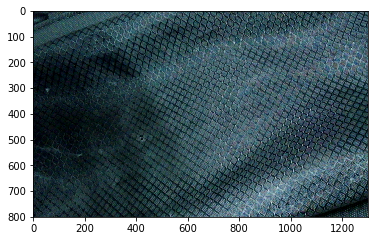

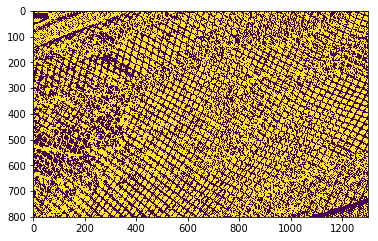

check2
check3
354 0 800 435
check4
check5


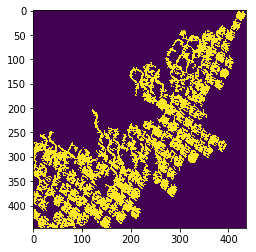

check6
check7
check8


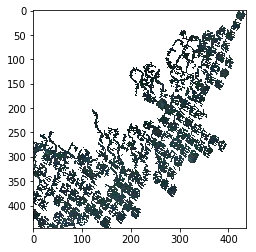

False
donee
donewait 50 13 10
Cam!
check1


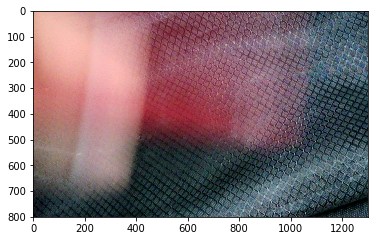

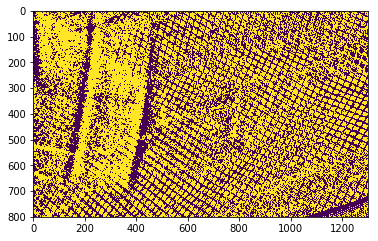

check2
check3
328 685 800 1300
check4
check5


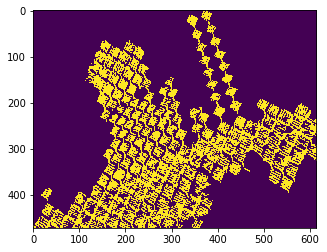

check6
No it blend 0.7104454685099847
donewait 48 13 10
donewait 50 13 10
Cam!
check1


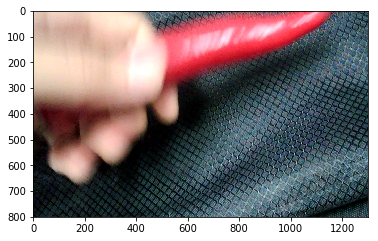

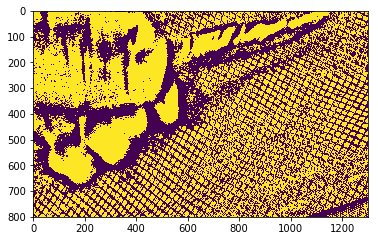

check2
check3
323 623 800 1300
check4
check5


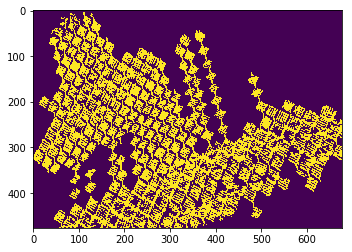

check6
check7
check8


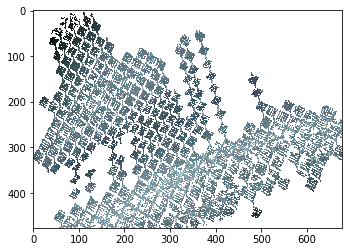

False
donee
donewait 50 13 10
Cam!
check1


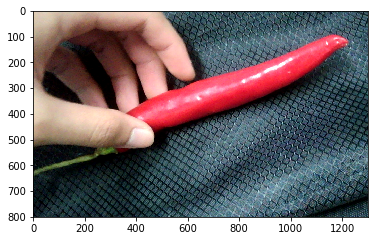

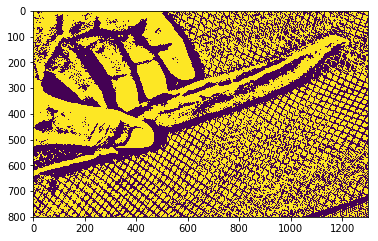

check2
check3
674 39 800 219
check4
check5


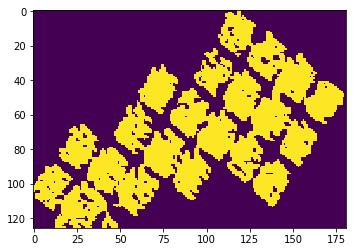

check6
check7
check8


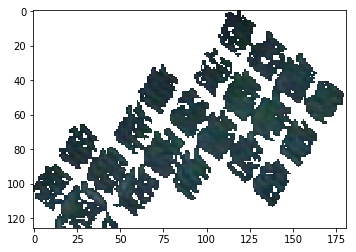

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


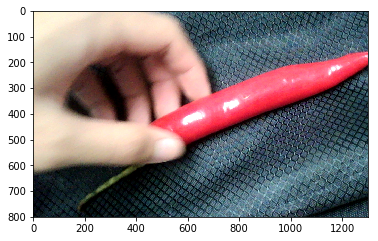

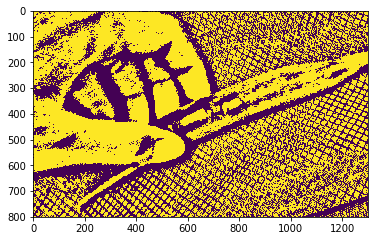

check2
check3
605 102 800 402
check4
check5


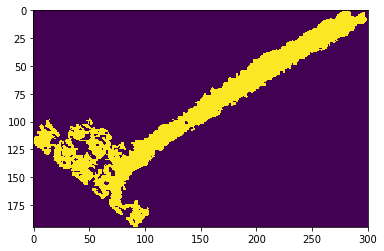

check6
check7
check8


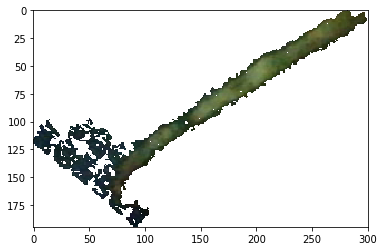

False
donee
donewait 48 13 10
donewait 48 13 10
donewait 50 13 10
Cam!
check1


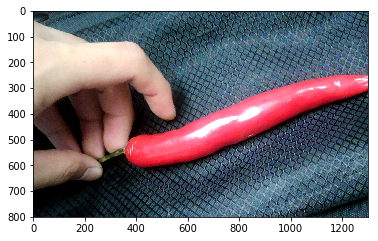

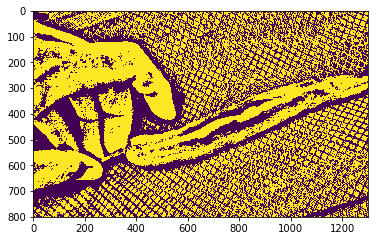

check2
check3
577 581 767 697
check4
check5


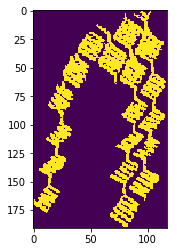

check6
check7
check8


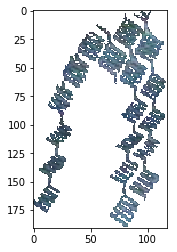

False
donee
donewait 50 13 10
Cam!
check1


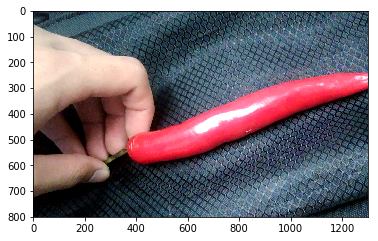

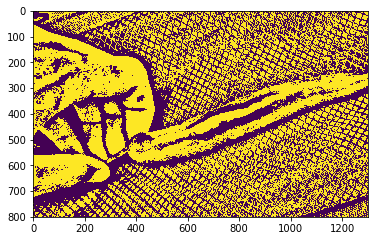

check2
check3
394 538 800 1300
check4
check5


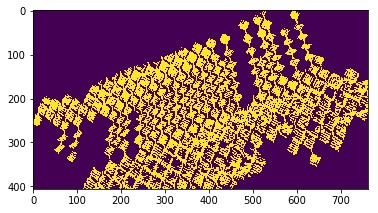

check6
check7
check8


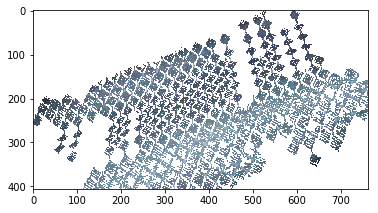

False
donee
donewait 48 13 10
donewait 50 13 10
Cam!
check1


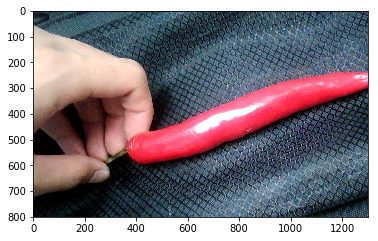

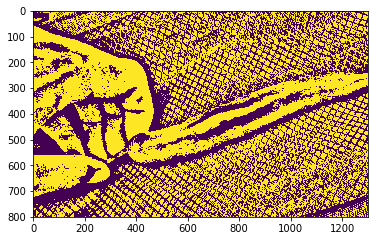

check2
check3
394 538 800 1300
check4
check5


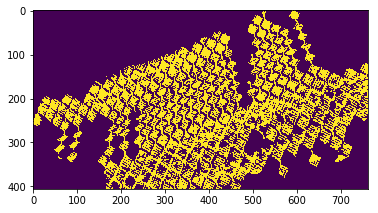

check6
check7
check8


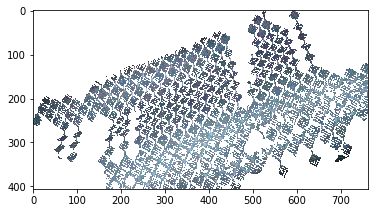

False
donee
donewait 50 13 10
Cam!
check1


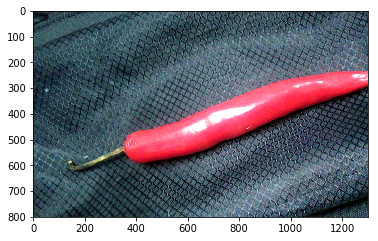

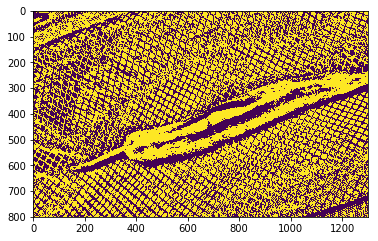

check2
check3
589 68 752 187
check4
check5


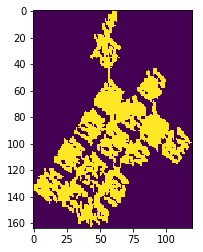

check6
check7
check8


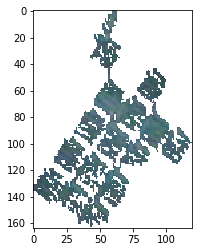

True
donee
donewait 48 13 10
donewait 48 13 10
donewait 48 13 10
donewait 48 13 10
donewait 48 13 10
donewait 48 13 10
donewait 49 13 10
donewait 50 13 10
Cam!
check1


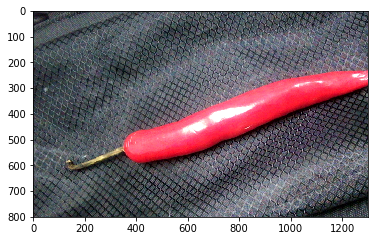

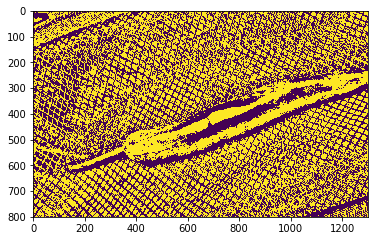

check2
check3
632 0 800 213
check4
check5


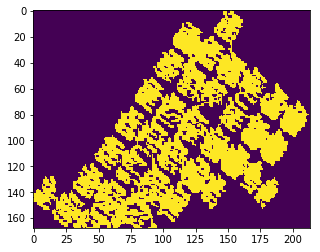

check6
check7
check8


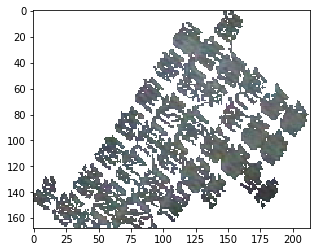

False
donee
donewait 50 13 10
Cam!
check1


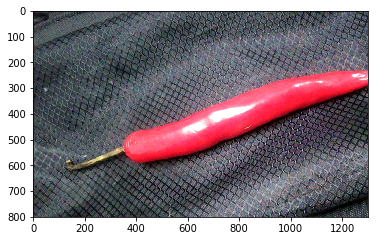

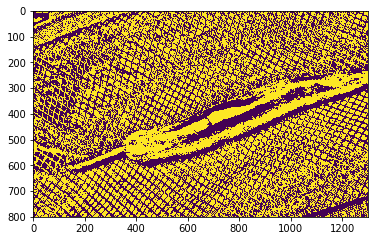

check2
check3
640 0 800 189
check4
check5


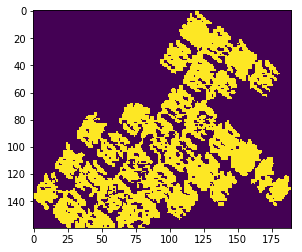

check6
check7
check8


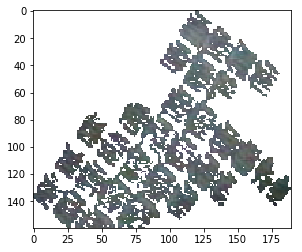

False
donee
donewait 48 13 10
donewait 48 13 10


SerialException: read failed: [Errno 6] Device not configured

In [32]:
while (True):
    waitforreq=ser.read_until()
    print(waitforreq)
    print("Requset code : ",waitforreq[0])
    if (waitforreq[0]!=50):
        continue
    ret=False
    while (ret==False):
        print("Cam!")
        ret, frame = cap.read() # ret is boolean for pic avalble or not
        
    print("Cam've got shot!")
    
    frame=frame[...,::-1] # cv2 BRG to RGB
    frame=frame[:,:]
    plt.imshow(frame)
    plt.show()
    
    #grayframe=rgb2gray(frame)
    #binary=(grayframe>0.4)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]>20)
    #binary= cv2.adaptiveThreshold(grayframe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    
    binary=(((frame[:,:,0]/frame[:,:,2])+(frame[:,:,1]/frame[:,:,2]))>2.2)
    
    plt.imshow(binary)
    plt.show()
    labelframe=label(binary)
    regiongrframe=regionprops(labelframe)
    
    print("Start find the nearest chillie.")
    
    labelreal=-1
    yreal=0
    minr, minc, maxr, maxc=0,0,0,0
    for j in range(len(regiongrframe)):
        area=regiongrframe[j].area
        y0,x0=regiongrframe[j].centroid
        if area<5000:
            pass
        elif(y0>yreal):
            labelreal= regiongrframe[j].label
            yreal=y0
            minr, minc, maxr, maxc = regiongrframe[j].bbox
    
    print("Deleting noise")
    
    binary=(labelframe==labelreal)
    frame[:,:,0]=frame[:,:,0]*binary
    frame[:,:,1]=frame[:,:,1]*binary
    frame[:,:,2]=frame[:,:,2]*binary
    
    print("Cropping photo : "minr,minc, maxr, maxc)
    binary=binary[minr:maxr+1,minc:maxc+1]
    frame=frame[minr:maxr+1,minc:maxc+1,:]
    
    print("check4")
    R=frame[:,:,0]
    G=frame[:,:,1]
    B=frame[:,:,2]
    #meanofrgb=(R+G+B)/1.65
    print("Detecting tail")
    biforblen=binary&(R>G*1.7)
    
    plt.imshow(biforblen!=binary)
    plt.show()
    
    if (np.sum(biforblen!=binary)<100):
        print("No tail detected")
        command=str.encode('0')
        ser.write(command)
        continue
    
    print("Calculate blend using convex")
    if (np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen))<70):
        #return false
        print("No it's blend : ",np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen)))
        command=str.encode('0')
        ser.write(command)
        continue
    
    print("Transforme background to white")
    frame[(R+G+B)==0]=255
    img=Image.fromarray(frame)
    print("Calculating colour.")
    plt.imshow(frame)
    plt.show()
    if(model.predict({'image': img})['classLabel']=='red'):
        #return true
        print("Good chilie")
        command=str.encode('1')
        ser.write(command)
    else:
            #return false
        print("chilie colour not good")
        command=str.encode('0')
        ser.write(command)
    print("donee")

In [2]:
'''
cap = cv2.VideoCapture(0)
time.sleep(0)
'''

'\ncap = cv2.VideoCapture(0)\ntime.sleep(0)\n'

In [3]:
model = coremltools.models.MLModel('Model/Colour Check.mlmodel')

In [4]:
#ret, frame = cap.read() # ret is boolean for pic avalble or not
#frame=frame[...,::-1] # cv2 BRG to RGB

In [5]:
frame=io.imread("Sample/S__15974406.jpg")

In [6]:
grayframe=rgb2gray(frame)
binary=(grayframe>0.006)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]>20)
labelframe=label(binary)
regiongrframe=regionprops(labelframe)


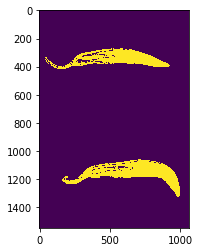

In [7]:
plt.imshow(binary)
plt.show()

In [8]:
labelreal=-1
yreal=0
minr, minc, maxr, maxc=0,0,0,0
for j in range(len(regiongrframe)):
    area=regiongrframe[j].area
    y0,x0=regiongrframe[j].centroid
    if area<5000:
        pass
    elif(y0>yreal):
        labelreal= regiongrframe[j].label
        yreal=y0
        minr, minc, maxr, maxc = regiongrframe[j].bbox

In [9]:
print(minr,minc, maxr, maxc)

1060 162 1328 999


In [10]:
binary=(labelframe==labelreal)
frame[:,:,0]=frame[:,:,0]*binary
frame[:,:,1]=frame[:,:,1]*binary
frame[:,:,2]=frame[:,:,2]*binary
binary=binary[minr:maxr+1,minc:maxc+1]
frame=frame[minr:maxr+1,minc:maxc+1,:]
    
R=frame[:,:,0]
G=frame[:,:,1]
B=frame[:,:,2]
meanofrgb=(R+G+B)/1.65

In [11]:
biforblen=binary&(R>G*1.7)
if (np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen))<70):
    #return false
    print("No it blend",np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen)))

No it blend 36.45820216859042


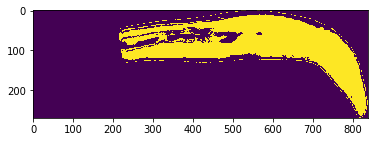

In [12]:
plt.imshow(biforblen)
plt.show()

True


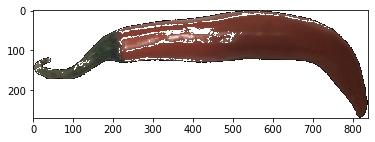

In [13]:
frame[(R+G+B)==0]=255
img=Image.fromarray(frame)
    
if(model.predict({'image': img})['classLabel']=='true'):
    #return true
    print("True")
else:
        #return false
    print("False")
plt.imshow(frame)
plt.show()

in While

In [14]:
'''
while (serial):
    ret, frame = cap.read() # ret is boolean for pic avalble or not
    frame=frame[...,::-1] # cv2 BRG to RGB
    grayframe=rgb2gray(frame)
    binary=grayframe>200
    labelframe=label(binary)
    regiongrframe=regionprops(labelframe)
    
    labelreal=-1
    yreal=0
    minr, minc, maxr, maxc=0,0,0,0
    for j in range(len(regiongrframe)):
        area=regiongrframe[j].area
        y0,x0=regiongrframe[j].centroid
        if area<5000:
            pass
        elif(y0>yreal):
            labelreal= regiongrframe[j].label
            yreal=y0
            minr, minc, maxr, maxc = region.bbox
    
    binary=(labelframe==labelreal)
    frame=frame*binary
    binary=binary[minr:maxr+1,minc,maxc+1]
    frame=frame[minr:maxr+1,minc,maxc+1,:]
    
    R=frame[:,:,0]
    G=frame[:,:,1]
    B=frame[:,:,2]
    meanofrgb=(R+G+B)/1.65
    
    biforblen=binary&(R>G*1.5)
    if (np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen))<70):
        #return false
        continue
    
    frame[(R+G+B)==0]=255
    img=Image.fromarray(frame)
    
    if(model.predict({'image': img})['classLabel']=='true'):
        #return true
    else:
        #return false
'''

"\nwhile (serial):\n    ret, frame = cap.read() # ret is boolean for pic avalble or not\n    frame=frame[...,::-1] # cv2 BRG to RGB\n    grayframe=rgb2gray(frame)\n    binary=grayframe>200\n    labelframe=label(binary)\n    regiongrframe=regionprops(labelframe)\n    \n    labelreal=-1\n    yreal=0\n    minr, minc, maxr, maxc=0,0,0,0\n    for j in range(len(regiongrframe)):\n        area=regiongrframe[j].area\n        y0,x0=regiongrframe[j].centroid\n        if area<5000:\n            pass\n        elif(y0>yreal):\n            labelreal= regiongrframe[j].label\n            yreal=y0\n            minr, minc, maxr, maxc = region.bbox\n    \n    binary=(labelframe==labelreal)\n    frame=frame*binary\n    binary=binary[minr:maxr+1,minc,maxc+1]\n    frame=frame[minr:maxr+1,minc,maxc+1,:]\n    \n    R=frame[:,:,0]\n    G=frame[:,:,1]\n    B=frame[:,:,2]\n    meanofrgb=(R+G+B)/1.65\n    \n    biforblen=binary&(R>G*1.5)\n    if (np.sum(biforblen)*100/np.sum(convex_hull_image(biforblen))<70):\n  

In [4]:

cap.release()
cv2.destroyAllWindows()
